In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('../data/telecom_churn.csv')

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Check the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 7043 rows and 21 columns.


In [12]:
# Check data types
print("Data Types of Each Column:\n", df.dtypes)

Data Types of Each Column:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [13]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN and checking the conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
# Now check how many missing values in TotalCharges
print(f"Missing values in 'TotalCharges': {df['TotalCharges'].isnull().sum()}")

Missing values in 'TotalCharges': 11


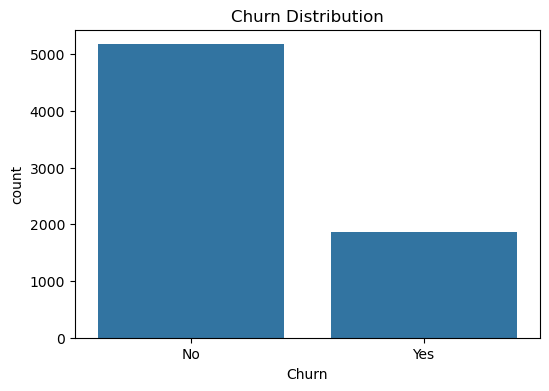

In [15]:
# Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

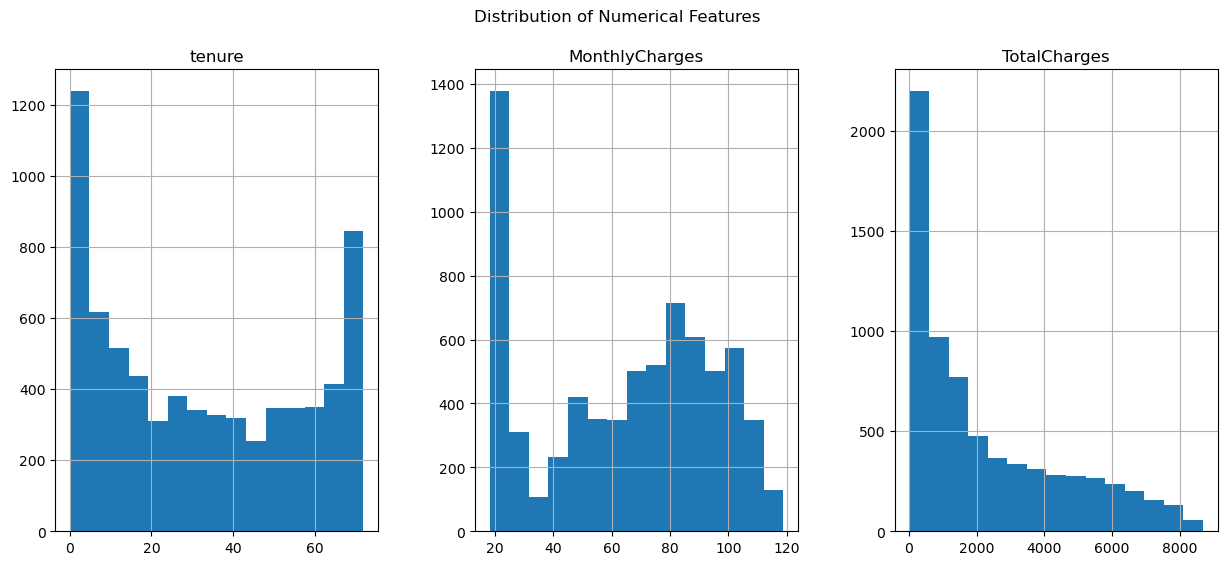

In [16]:
# Numerical Columns: 'tenure', 'MonthlyCharges', 'TotalCharges'
# Visualize their distributions
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [17]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1000x800 with 0 Axes>

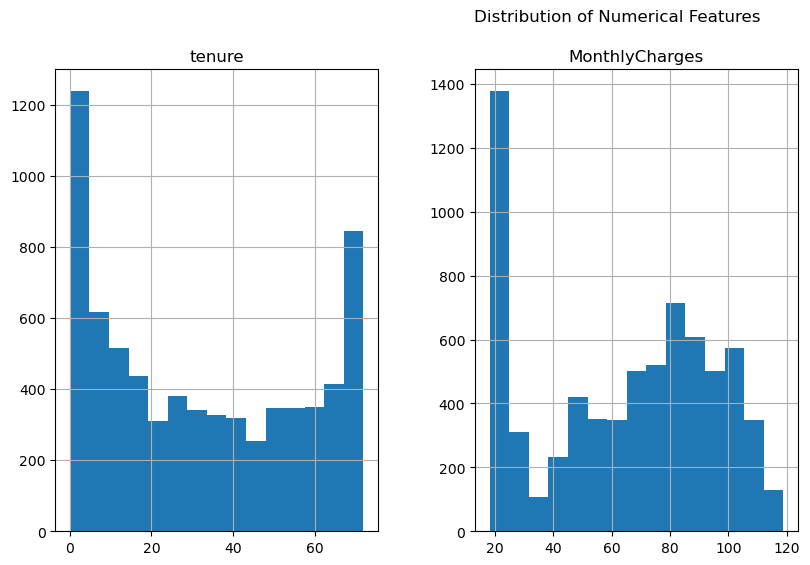

In [8]:
# Plot the distribution of numerical features
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

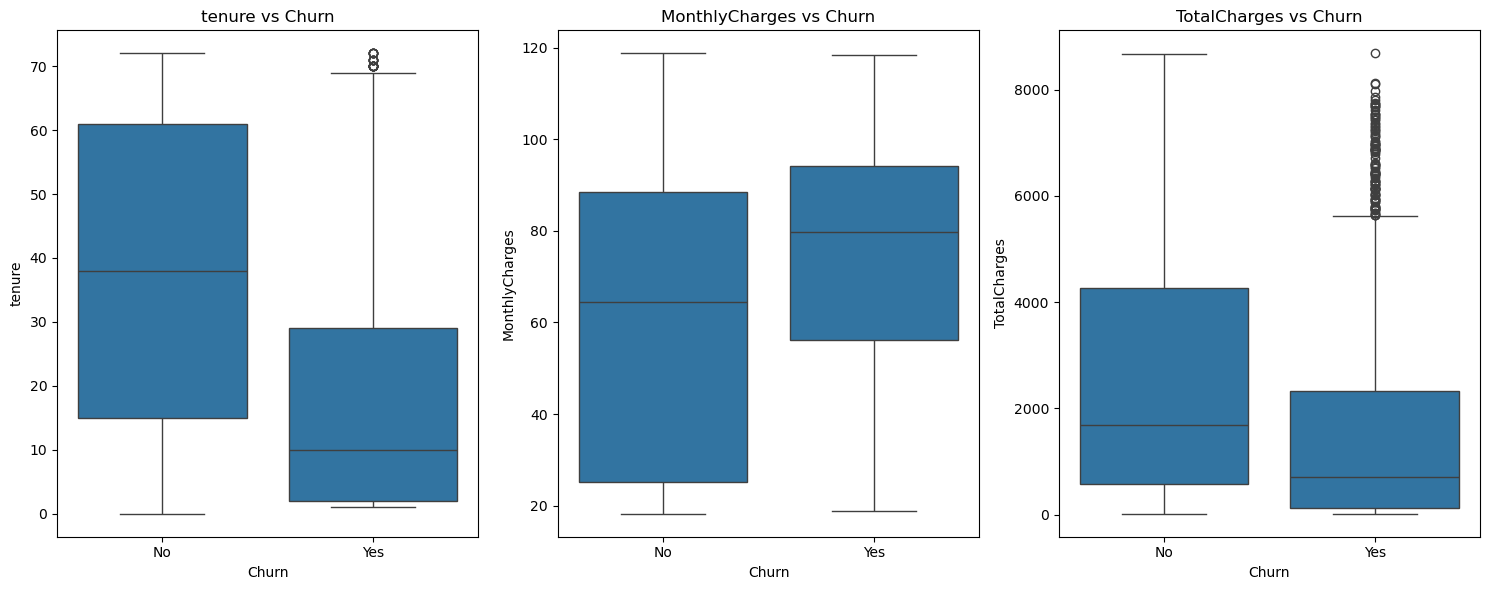

In [18]:
# Boxplots to explore relationships between numerical features and churn
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()


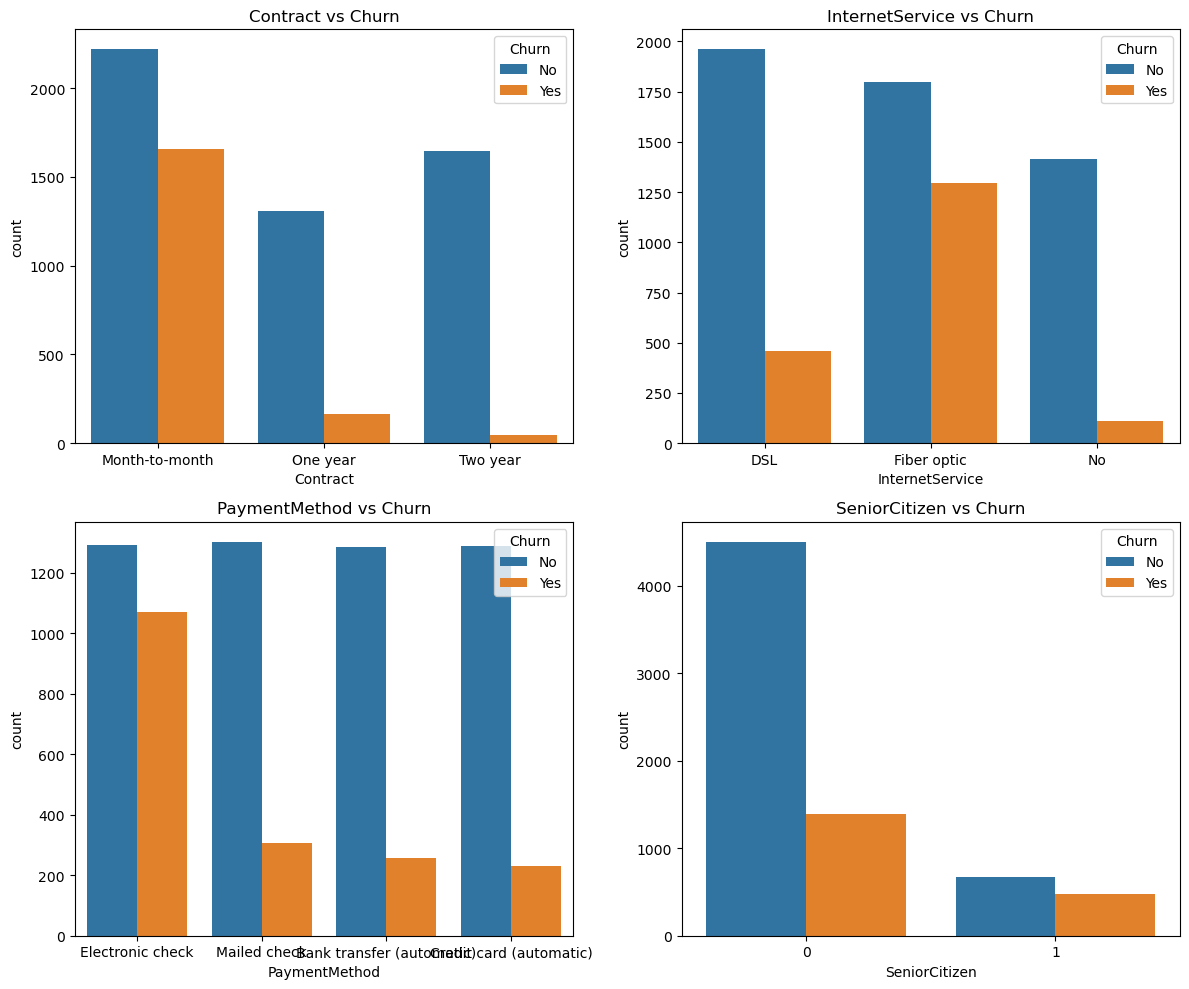

In [19]:
# Visualizing relationships between categorical variables and churn
categorical_columns = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# Insight: 
* Customers with longer tenure and lower monthly charges are less likely to churn.


In [20]:
# Saving a cleaned version of the dataset for use in preprocessing
df.to_csv('../data/telecom_churn_clean.csv', index=False)